# Exemple RandomForest avec dataset Titanic

Usage du dataset *titanic* pour illustrer l'usage des ***Random Forest***.


In [78]:
import pandas as pnd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier


## Lecture et Cleaning

Première étape : lecture du dataset et nettoyage des données. 

In [47]:
titanic = pnd.read_csv('TitanicSurvival.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1309 non-null   object 
 1   survived        1309 non-null   object 
 2   sex             1309 non-null   object 
 3   age             1046 non-null   float64
 4   passengerClass  1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


In [48]:
titanic.head(15)

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st
5,"Anderson, Mr. Harry",yes,male,48.00,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.00,1st
7,"Andrews, Mr. Thomas Jr",no,male,39.00,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.00,1st
9,"Artagaveytia, Mr. Ramon",no,male,71.00,1st


On va réduire la précision (pour l'age) et renomer la première colonne. 

In [49]:
pnd.set_option('precision', 2)
titanic.rename(columns={'Unnamed: 0':'passenger'}, inplace=True)
titanic.head(10)

,passenger,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st
5,"Anderson, Mr. Harry",yes,male,48.00,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.00,1st
7,"Andrews, Mr. Thomas Jr",no,male,39.00,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.00,1st
9,"Artagaveytia, Mr. Ramon",no,male,71.00,1st


On va transformer les valeurs texte des colonnes survived, age et passenferclass en valeurs numériques. 

In [50]:
ti2 = pnd.get_dummies (titanic, columns=['survived','sex'], drop_first=True)
ti2 = pnd.get_dummies (ti2, columns=['passengerClass'])
ti2.sample(15)

,passenger,age,survived_yes,sex_male,passengerClass_1st,passengerClass_2nd,passengerClass_3rd
365,"Carter, Mrs. Ernest Courtenay (",44.0,0,0,0,1,0
83,"Crosby, Mrs. Edward Gifford (Ca",64.0,1,0,1,0,0
734,"Coutts, Master. William Loch W",3.0,1,1,0,0,1
935,"Kink-Heilmann, Mr. Anton",29.0,1,1,0,0,1
886,"Jermyn, Miss. Annie",NaN,1,0,0,0,1
4,"Allison, Mrs. Hudson J C (Bessi",25.0,0,0,1,0,0
950,"Larsson, Mr. August Viktor",29.0,0,1,0,0,1
877,"Ilmakangas, Miss. Ida Livija",27.0,0,0,0,0,1
113,"Fortune, Miss. Mabel Helen",23.0,1,0,1,0,0
848,"Hansen, Mr. Claus Peter",41.0,0,1,0,0,1


maintenant, on peut remplir les ages NA avec l'age moyenne (on aurait pu les supprimer aussi). 

In [51]:
ti2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger           1309 non-null   object 
 1   age                 1046 non-null   float64
 2   survived_yes        1309 non-null   uint8  
 3   sex_male            1309 non-null   uint8  
 4   passengerClass_1st  1309 non-null   uint8  
 5   passengerClass_2nd  1309 non-null   uint8  
 6   passengerClass_3rd  1309 non-null   uint8  
dtypes: float64(1), object(1), uint8(5)
memory usage: 27.0+ KB


In [52]:
ti2.describe()

,age,survived_yes,sex_male,passengerClass_1st,passengerClass_2nd,passengerClass_3rd
count,1046.00,1309.00,1309.00,1309.00,1309.00,1309.00
mean,29.88,0.38,0.64,0.25,0.21,0.54
std,14.41,0.49,0.48,0.43,0.41,0.50
min,0.17,0.00,0.00,0.00,0.00,0.00
25%,21.00,0.00,0.00,0.00,0.00,0.00
50%,28.00,0.00,1.00,0.00,0.00,1.00
75%,39.00,1.00,1.00,0.00,0.00,1.00
max,80.00,1.00,1.00,1.00,1.00,1.00


In [53]:
ti2['age'].fillna (ti2['age'].mean(),inplace=True)
ti2['age'].describe()

count    1309.00
mean       29.88
std        12.88
min         0.17
25%        22.00
50%        29.88
75%        35.00
max        80.00
Name: age, dtype: float64

## Séparation X & Y, Training & Test
Sélection des features et séparation de notre dataset en test et training. 

In [54]:
train_titanic, test_titanic = train_test_split (ti2, test_size=0.3)
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 1228 to 800
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger           916 non-null    object 
 1   age                 916 non-null    float64
 2   survived_yes        916 non-null    uint8  
 3   sex_male            916 non-null    uint8  
 4   passengerClass_1st  916 non-null    uint8  
 5   passengerClass_2nd  916 non-null    uint8  
 6   passengerClass_3rd  916 non-null    uint8  
dtypes: float64(1), object(1), uint8(5)
memory usage: 25.9+ KB


In [55]:
features_names = ['age','sex_male','passengerClass_1st','passengerClass_2nd','passengerClass_3rd']
features_names

['age',
 'sex_male',
 'passengerClass_1st',
 'passengerClass_2nd',
 'passengerClass_3rd']

In [56]:
X_train = train_titanic[features_names]
X_test = test_titanic[features_names]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 138 to 1170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 393 non-null    float64
 1   sex_male            393 non-null    uint8  
 2   passengerClass_1st  393 non-null    uint8  
 3   passengerClass_2nd  393 non-null    uint8  
 4   passengerClass_3rd  393 non-null    uint8  
dtypes: float64(1), uint8(4)
memory usage: 7.7 KB


In [57]:
Y_train = train_titanic['survived_yes']
Y_test = test_titanic['survived_yes']
Y_train[15:30]

44      1
1218    0
287     0
825     0
604     1
684     0
458     1
877     0
115     0
374     0
76      1
1276    0
312     0
1071    1
201     0
Name: survived_yes, dtype: uint8

## Création des modèles

### Arbre de décision simple

Au début, on va créer une simple **arbre de décision**, puis on pourra comparer les résultats de ce modèle aux modèles avec **Random Forest**. 


In [98]:
max_depth = 4

arbre = DecisionTreeClassifier(max_depth=max_depth)
arbre.fit (X_train, Y_train)

for f,i in zip(features_names, arbre.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))

#pnd.DataFrame({'feature' : features_names,
#               'importance' : arbre.feature_importances_ })


 age : 0.1319 
 sex_male : 0.6274 
 passengerClass_1st : 0.0511 
 passengerClass_2nd : 0.0059 
 passengerClass_3rd : 0.1838 


In [99]:
pred_arbre = arbre.predict(X_test)

In [100]:
print (confusion_matrix (Y_test, pred_arbre))


[[214  38]
 [ 43  98]]


In [111]:
print (classification_report(Y_test, pred_arbre))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       252
           1       0.72      0.70      0.71       141

    accuracy                           0.79       393
   macro avg       0.78      0.77      0.77       393
weighted avg       0.79      0.79      0.79       393



In [102]:
ac = accuracy_score (Y_test, pred_arbre)
pr = precision_score (Y_test, pred_arbre)
re = recall_score (Y_test, pred_arbre)

print ("Accurancy = {acc:.2f}\
        Precision = {prec:.2f}\
        Recall = {rec:.2f}".format(acc = ac, prec = pr, rec = re))

Accurancy = 0.79        Precision = 0.72        Recall = 0.70


[Text(267.375, 391.392, 'sex_male <= 0.5\ngini = 0.477\nsamples = 916\nvalue = [557, 359]\nclass = No'),
 Text(151.125, 304.416, 'passengerClass_3rd <= 0.5\ngini = 0.391\nsamples = 326\nvalue = [87, 239]\nclass = Yes'),
 Text(93.0, 217.44, 'passengerClass_2nd <= 0.5\ngini = 0.128\nsamples = 175\nvalue = [12, 163]\nclass = Yes'),
 Text(46.5, 130.464, 'age <= 8.5\ngini = 0.039\nsamples = 100\nvalue = [2, 98]\nclass = Yes'),
 Text(23.25, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(69.75, 43.488, 'gini = 0.02\nsamples = 99\nvalue = [1, 98]\nclass = Yes'),
 Text(139.5, 130.464, 'age <= 56.0\ngini = 0.231\nsamples = 75\nvalue = [10, 65]\nclass = Yes'),
 Text(116.25, 43.488, 'gini = 0.195\nsamples = 73\nvalue = [8, 65]\nclass = Yes'),
 Text(162.75, 43.488, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(209.25, 217.44, 'age <= 0.875\ngini = 0.5\nsamples = 151\nvalue = [75, 76]\nclass = Yes'),
 Text(186.0, 130.464, 'gini = 0.0\nsamples = 3\nvalue = [0, 3

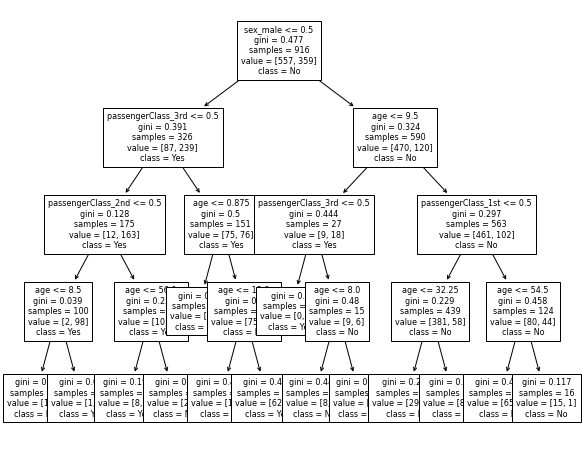

In [103]:
%matplotlib inline
plt.figure(figsize=(10,8))

plot_tree(arbre, feature_names=features_names, 
          class_names=['No','Yes'], fontsize=8)

In [127]:
print (export_text(arbre, feature_names=features_names, 
                spacing=3, decimals=2))

|--- sex_male <= 0.50
|   |--- passengerClass_3rd <= 0.50
|   |   |--- passengerClass_2nd <= 0.50
|   |   |   |--- age <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  8.50
|   |   |   |   |--- class: 1
|   |   |--- passengerClass_2nd >  0.50
|   |   |   |--- age <= 56.00
|   |   |   |   |--- class: 1
|   |   |   |--- age >  56.00
|   |   |   |   |--- class: 0
|   |--- passengerClass_3rd >  0.50
|   |   |--- age <= 0.88
|   |   |   |--- class: 1
|   |   |--- age >  0.88
|   |   |   |--- age <= 12.00
|   |   |   |   |--- class: 0
|   |   |   |--- age >  12.00
|   |   |   |   |--- class: 1
|--- sex_male >  0.50
|   |--- age <= 9.50
|   |   |--- passengerClass_3rd <= 0.50
|   |   |   |--- class: 1
|   |   |--- passengerClass_3rd >  0.50
|   |   |   |--- age <= 8.00
|   |   |   |   |--- class: 0
|   |   |   |--- age >  8.00
|   |   |   |   |--- class: 1
|   |--- age >  9.50
|   |   |--- passengerClass_1st <= 0.50
|   |   |   |--- age <= 32.25
|   |   |   |   |--- class: 0
|   

### Random Forest

On essaie maintenant de construire une forêt aléatoire avec les mêmes paramètres (max_depth) et un nombre limité d'estimators.   

In [108]:
foret = RandomForestClassifier (n_estimators=8, max_depth=max_depth)

foret.fit(X_train, Y_train)

for f,i in zip(features_names, foret.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))

 age : 0.1930 
 sex_male : 0.5602 
 passengerClass_1st : 0.1114 
 passengerClass_2nd : 0.0227 
 passengerClass_3rd : 0.1128 


In [109]:
pred_foret = foret.predict(X_test)

print (confusion_matrix (Y_test, pred_foret))

[[236  16]
 [ 56  85]]


In [110]:
print (classification_report(Y_test, pred_foret))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       252
           1       0.84      0.60      0.70       141

    accuracy                           0.82       393
   macro avg       0.82      0.77      0.79       393
weighted avg       0.82      0.82      0.81       393



In [118]:
i = 1
for tree in foret.estimators_ :
    print (i,export_text(tree, feature_names=features_names, 
                spacing=3, decimals=2))
    i += 1

1 |--- sex_male <= 0.50
|   |--- passengerClass_1st <= 0.50
|   |   |--- age <= 56.00
|   |   |   |--- passengerClass_2nd <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- passengerClass_2nd >  0.50
|   |   |   |   |--- class: 1.0
|   |   |--- age >  56.00
|   |   |   |--- class: 0.0
|   |--- passengerClass_1st >  0.50
|   |   |--- age <= 9.00
|   |   |   |--- class: 0.0
|   |   |--- age >  9.00
|   |   |   |--- age <= 35.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- age >  35.50
|   |   |   |   |--- class: 1.0
|--- sex_male >  0.50
|   |--- passengerClass_1st <= 0.50
|   |   |--- age <= 9.50
|   |   |   |--- age <= 0.38
|   |   |   |   |--- class: 0.0
|   |   |   |--- age >  0.38
|   |   |   |   |--- class: 1.0
|   |   |--- age >  9.50
|   |   |   |--- passengerClass_3rd <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- passengerClass_3rd >  0.50
|   |   |   |   |--- class: 0.0
|   |--- passengerClass_1st >  0.50
|   |   |--- age <= 49.50
|   |   |   |--- age <= 47

### Comparaison
Maintenant, on va essayer de créer pour les deux algorithmes, des modèles plus performants et on va les comparer. 


In [121]:
arbre2 = DecisionTreeClassifier(max_depth=(max_depth*2))
arbre2.fit (X_train, Y_train)
pred_arbre2 = arbre2.predict (X_test)


for f,i in zip(features_names, arbre2.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))
                               

 age : 0.2826 
 sex_male : 0.5170 
 passengerClass_1st : 0.0469 
 passengerClass_2nd : 0.0010 
 passengerClass_3rd : 0.1525 


In [122]:
foret2 = RandomForestClassifier (n_estimators=50, max_depth=(max_depth*2))
foret2.fit(X_train, Y_train)
pred_foret2 = foret2.predict(X_test)

for f,i in zip(features_names, foret2.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))

 age : 0.3623 
 sex_male : 0.4477 
 passengerClass_1st : 0.0730 
 passengerClass_2nd : 0.0258 
 passengerClass_3rd : 0.0912 


In [123]:
print (classification_report(Y_test, pred_arbre2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       252
           1       0.73      0.68      0.70       141

    accuracy                           0.79       393
   macro avg       0.78      0.77      0.77       393
weighted avg       0.79      0.79      0.79       393



In [124]:
print (classification_report(Y_test, pred_foret2))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       252
           1       0.75      0.69      0.72       141

    accuracy                           0.81       393
   macro avg       0.79      0.78      0.79       393
weighted avg       0.80      0.81      0.80       393



In [125]:
confusion_matrix (Y_test, pred_arbre2)

array([[216,  36],
       [ 45,  96]])

In [126]:
confusion_matrix (Y_test, pred_foret2)

array([[220,  32],
       [ 44,  97]])